In [1]:
import torch
import torch.nn.functional as F

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p1 = torch.Tensor([0.25, 0.75])
p2 = torch.Tensor([0.1, 0.9])
p3 = torch.Tensor([0.4, 0.6])

In [35]:
v1 = F.gumbel_softmax(logits=p1.log(), hard=True)
v1

tensor([0., 1.])

# 1. Nos centramos en $p_1$

tensor([256., 744.])


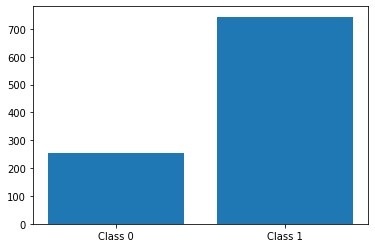

In [4]:
N = 10**3

v = F.gumbel_softmax(logits=p1.log(), hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p1.log(), hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([242., 758.])


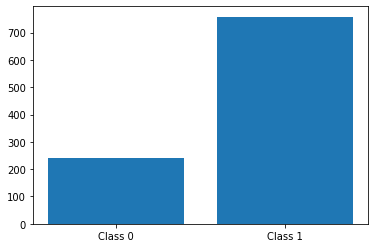

In [5]:
N = 10**3

v = F.gumbel_softmax(logits=p1.log(), tau=2, hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p1.log(), tau=2, hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

No funciona el parámetro $\tau$. No tiene ningún efecto en nuestros resultados.

# Nos centramos en $p_2$

tensor([102., 898.])


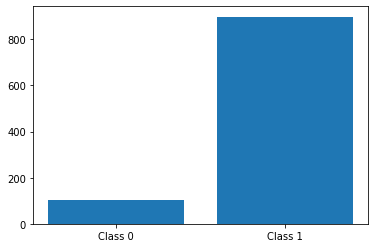

In [6]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([499.9464, 500.0535])


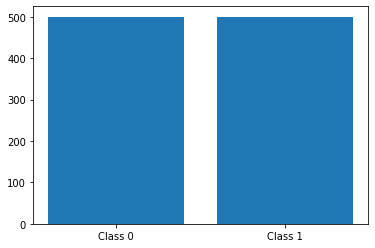

In [7]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), tau=10**4, hard=False)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), tau=10**4, hard=False)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([ 95., 905.])


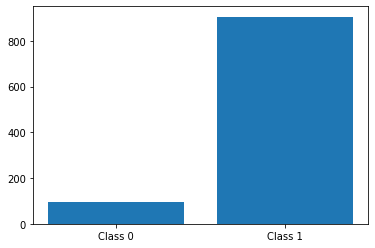

In [8]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), tau=10**4, hard=True)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), tau=10**4, hard=True)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

tensor([102.2287, 897.7713])


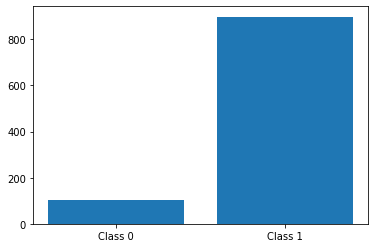

In [9]:
N = 10**3

v = F.gumbel_softmax(logits=p2.log(), tau=0.1, hard=False)

for i in range(1, N):
    v += F.gumbel_softmax(logits=p2.log(), tau=0.1, hard=False)

plt.bar(['Class 0', 'Class 1'], v)
print(v)

Cuando el modo está en $\texttt{hard}=True$, entonces las probabilidades si que las ajusta de puta madre.

# 3. Probamos probabilidades multiclase!

In [10]:
p = torch.Tensor([0.1, 0.3, 0.6])

tensor([107., 318., 575.])


<BarContainer object of 3 artists>

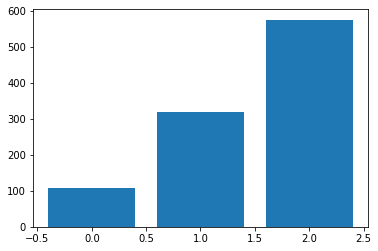

In [11]:
v = F.gumbel_softmax(logits=p.log(), hard=True)

for i in range (1, N):
    v += F.gumbel_softmax(logits=p.log(), hard=True)

print(v)

plt.bar(np.arange(3), v)

tensor([0.3329, 0.3332, 0.3339])


<BarContainer object of 3 artists>

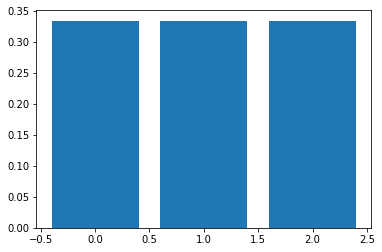

In [12]:
v = F.gumbel_softmax(logits=p.log(), hard=False, tau=1000)

print(v)

plt.bar(np.arange(3), v)

tensor([151.6438, 323.2898, 525.0663])


<BarContainer object of 3 artists>

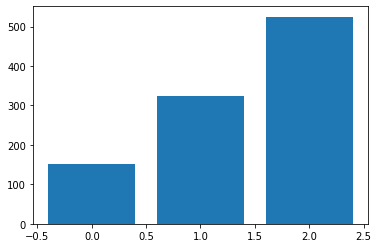

In [13]:
v = F.gumbel_softmax(logits=p.log(), hard=False)

for i in range (1, N):
    v += F.gumbel_softmax(logits=p.log(), hard=False)

print(v)

plt.bar(np.arange(3), v)

tensor([11.0649, 28.8714, 60.0637])


<BarContainer object of 3 artists>

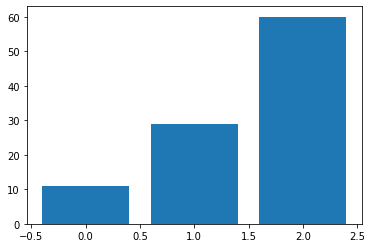

In [14]:
v = F.gumbel_softmax(logits=p.log(), hard=False, tau=0.1)

for i in range (1, 100):
    v += F.gumbel_softmax(logits=p.log(), hard=False, tau=0.1)

print(v)

plt.bar(np.arange(3), v)

# 4. Nos centramos en $\texttt{hard}=False$

In [15]:
n = 10**3
tau = 0.5
v1 = F.gumbel_softmax(logits=p1.log(), tau=tau)
v2 = F.gumbel_softmax(logits=p2.log(), tau=tau)
v3 = F.gumbel_softmax(logits=p3.log(), tau=tau)

for seed in range(1, n):

    v1 += F.gumbel_softmax(logits=p1.log(), tau=tau)
    v2 += F.gumbel_softmax(logits=p2.log(), tau=tau)
    v3 += F.gumbel_softmax(logits=p3.log(), tau=tau)
v1 = v1/n
v2 = v2/n
v3 = v3/n

print(v1, v2, v3)

tensor([0.2718, 0.7282]) tensor([0.1319, 0.8681]) tensor([0.4146, 0.5854])


# 5. Compute Gradients

In [16]:
p1 = torch.tensor([0.25, 0.75], requires_grad = True)
p2 = torch.tensor([0.1, 0.9], requires_grad = True)
p3 = torch.tensor([0.4, 0.6], requires_grad = True)

In [17]:
tau = 100
v1 = F.gumbel_softmax(logits=p1.log(), tau=tau, hard=True)
v2 = F.gumbel_softmax(logits=p2.log(), tau=tau, hard=False)
v3 = F.gumbel_softmax(logits=p3.log(), tau=tau, hard=False)

In [18]:
v1, v2, v3

(tensor([0., 1.], grad_fn=<AddBackward0>),
 tensor([0.5043, 0.4957], grad_fn=<SoftmaxBackward0>),
 tensor([0.4980, 0.5020], grad_fn=<SoftmaxBackward0>))

In [19]:
external_grad = torch.tensor([1., 1.])

In [20]:
# v1.backward(gradient=external_grad), v2.backward(gradient=external_grad), v3.backward(gradient=external_grad)
v1.sum().backward(), v2.sum().backward(), v3.sum().backward()

(None, None, None)

In [21]:
p1.grad, p2.grad, p3.grad

(tensor([2.3370e-09, 8.1047e-10]), tensor([0., 0.]), tensor([0., 0.]))

# TOY EXAMPLE

In [22]:
a = torch.tensor([1., 2., 3.], requires_grad=True)
b = torch.tensor([4., 5., 6.], requires_grad=True)

In [23]:
c = a**2 - b

In [24]:
c.sum().backward()

In [25]:
a.grad, b.grad

(tensor([2., 4., 6.]), tensor([-1., -1., -1.]))

In [26]:
torch.randn(3,3)

tensor([[-1.2281,  1.1931, -0.4103],
        [ 1.3766,  0.6604,  0.7927],
        [ 1.6185, -0.5224, -0.7101]])